# Import

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as stat
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
df= pd.read_csv('admission.csv')

In [4]:
df.head()

,Sno,Gre,Toefl,Rating,Sop,Lor,Cgpa,Research,Chance
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
df.drop(columns=["Sno"], inplace=True)

In [6]:
df.head()


,Gre,Toefl,Rating,Sop,Lor,Cgpa,Research,Chance
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [7]:
df.shape

(500, 8)

In [8]:
df.describe()

,Gre,Toefl,Rating,Sop,Lor,Cgpa,Research,Chance
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [9]:
df['Rating'].value_counts()


3    162
2    126
4    105
5     73
1     34
Name: Rating, dtype: int64

In [10]:
df['Research'].value_counts()

1    280
0    220
Name: Research, dtype: int64

In [11]:
df['Lor'].value_counts()


3.0    99
4.0    94
3.5    86
4.5    63
5.0    50
2.5    50
2.0    46
1.5    11
1.0     1
Name: Lor, dtype: int64

# Univariate Analysis

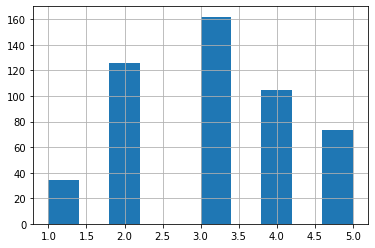

In [12]:
df['Rating'].hist()

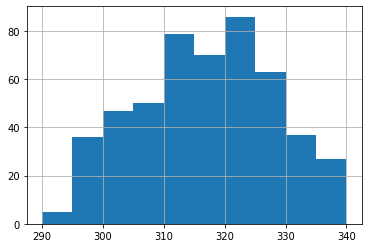

In [13]:
df['Gre'].hist()

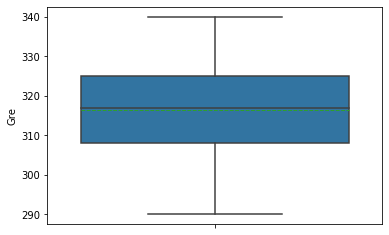

In [14]:
sns.boxplot(y="Gre",data=df,showmeans=True,meanline=True)

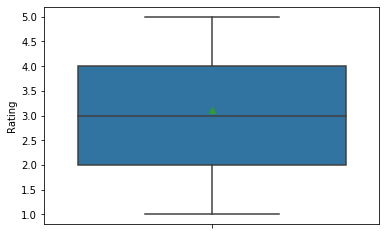

In [15]:
sns.boxplot(y='Rating',data=df,showmeans=True)

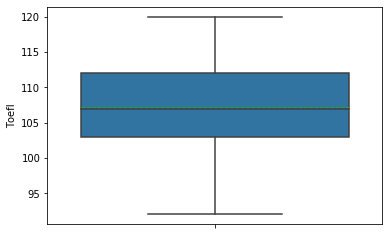

In [16]:
sns.boxplot(y='Toefl',data=df,showmeans=True,meanline=True)

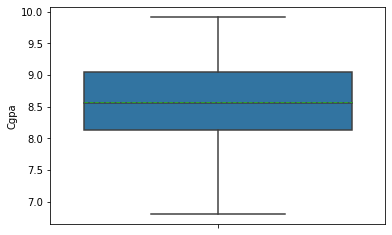

In [17]:
sns.boxplot(y='Cgpa',data=df,showmeans=True,meanline=True)

# Bi-Variate Analysis

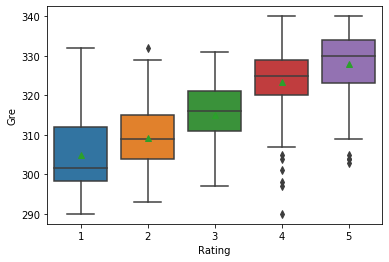

In [18]:
sns.boxplot(y='Gre',x='Rating',data=df, showmeans=True)

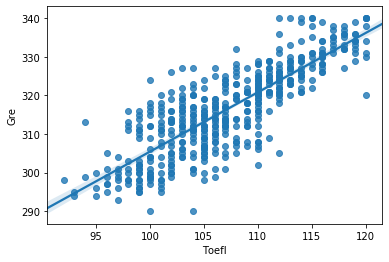

In [19]:
sns.regplot(x='Toefl',y='Gre',data=df)

In [20]:
df.describe()

,Gre,Toefl,Rating,Sop,Lor,Cgpa,Research,Chance
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


# Models

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [22]:
X = df[['Gre','Toefl','Cgpa','Rating', 'Sop', 'Lor', 'Research']]
y = df['Chance']
print(X.shape,y.shape)

(500, 7) (500,)


In [23]:
# Split data into train and test 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [24]:
## Fit model or Training Model
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)  # Build model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
#train the model
lr_model.score(X_train,y_train)

0.8320945273130533

In [26]:
## Evaluate Model using test data 
y_pred =lr_model.predict(X_test)

In [27]:
from sklearn.metrics import r2_score
r2score = r2_score(y_test,y_pred)
print(f"R2 Score: {r2score:0.2f}")

R2 Score: 0.77


# Decsion Tree Regressor

In [29]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor(random_state=0)
dt_model.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

In [31]:
dt_model.score(X_train,y_train)

1.0

In [33]:
y2_pred = dt_model.predict(X_test)

In [35]:
score = r2_score(y_test,y2_pred)
print(f"R2 Score: {score:0.2f}")

R2 Score: 0.59
